
<div class="alert alert-block alert-info"><font size="5"><center><b><u>S16 T01: Pipelines, grid search i text mining
\begin{align*}Marc\:Breysse\end{align*}</div>

<span style=color:blue>Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.</span>

<span style=color:green>Study with Iris dataset<span>

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [25]:
# Use of Iris dataset
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
# transform categorical variable to numerical variable
df['class'].replace({'Iris-setosa': '1', 'Iris-versicolor': '2', 'Iris-virginica': '3'},inplace= True)

# Also possible to use RandomForestClassifier without need to transform categorical variable

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [30]:
# Separating out the features and target
X, y = df.drop(['class'],axis=1), df['class']

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [32]:
# Pipeline including standardization, PCA and Random forest model
pipeline =Pipeline([('scalar1',StandardScaler()),
                      ('pca1',PCA(n_components=2)),
                      ('random_forest', RandomForestRegressor())])
model = pipeline .fit(X_train, y_train)
model.score(X_test,y_test).round(3)

0.887

In [33]:
# Random Forest parameters
param_grid = {"random_forest__n_estimators": [1,10,20,50,75,200],
              "random_forest__min_samples_leaf": range(1,10)}

In [34]:
# GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid=param_grid, cv= 5)
# fit
best_model = grid_pipeline.fit(X_train,y_train)

In [36]:
grid_pipeline.best_params_

{'random_forest__min_samples_leaf': 4, 'random_forest__n_estimators': 10}

In [37]:
best_model.score(X_test,y_test)

0.9163923879833319

<span style=color:green>*Score has been improved from 0.89 to 0.92*</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.</span>

In [38]:
#Loading NLTK
import nltk

text="""The English Patient is a 1996 British-American epic romantic war drama film. The eponymous protagonist, a man burned beyond recognition who speaks with an English accent, tells his story to the young nurse caring for him in a series of flashbacks, revealing his true identity and the love affair he was involved in before the war."""

In [39]:
#Sentence Tokenization
from nltk.tokenize import sent_tokenize
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['The English Patient is a 1996 British-American epic romantic war drama film.', 'The eponymous protagonist, a man burned beyond recognition who speaks with an English accent, tells his story to the young nurse caring for him in a series of flashbacks, revealing his true identity and the love affair he was involved in before the war.']


In [40]:
#Word Tokenization
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['The', 'English', 'Patient', 'is', 'a', '1996', 'British-American', 'epic', 'romantic', 'war', 'drama', 'film', '.', 'The', 'eponymous', 'protagonist', ',', 'a', 'man', 'burned', 'beyond', 'recognition', 'who', 'speaks', 'with', 'an', 'English', 'accent', ',', 'tells', 'his', 'story', 'to', 'the', 'young', 'nurse', 'caring', 'for', 'him', 'in', 'a', 'series', 'of', 'flashbacks', ',', 'revealing', 'his', 'true', 'identity', 'and', 'the', 'love', 'affair', 'he', 'was', 'involved', 'in', 'before', 'the', 'war', '.']


In [41]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 49 samples and 61 outcomes>


In [42]:
#Frequency most commun words
fdist.most_common(15)

[('a', 3),
 (',', 3),
 ('the', 3),
 ('The', 2),
 ('English', 2),
 ('war', 2),
 ('.', 2),
 ('his', 2),
 ('in', 2),
 ('Patient', 1),
 ('is', 1),
 ('1996', 1),
 ('British-American', 1),
 ('epic', 1),
 ('romantic', 1)]

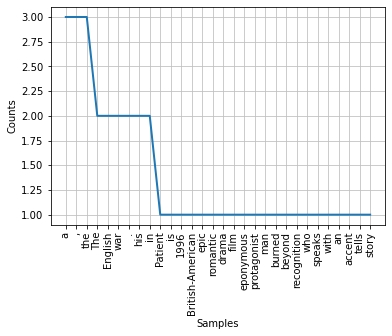

In [43]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Treu les stopwords i realitza stemming al teu conjunt de dades.<span>

<span style=color:green><b>Study with a dataset of tweets<b></span>
    
<span style=color:green>*Each tweet has a label ‘0’ for positive sentiment ‘1’ for negative sentiment*<span>

In [44]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [45]:
data = pd.read_csv('Tweets.csv', index_col=0)
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [46]:
# Data cleaning
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [47]:
data['tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide society now #motivation


<span style=color:green><b>Stopwords removal<span>

In [48]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday majesty
3,4,0,#model love u take u time ur
4,5,0,factsguide society #motivation


In [50]:
# Tokenization
tt = TweetTokenizer()
tokenized_tweet=data['tweet'].apply(tt.tokenize)
tokenized_tweet

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, #lyft, credit, use, cause, offer, whe...
2                                        [bihday, majesty]
3                     [#model, love, u, take, u, time, ur]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                    [ate, isz, youuu]
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: tweet, Length: 31962, dtype: object

<span style=color:green><b>Stemming<span>

In [51]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, use, caus, offer, wheel...
2                                    [bihday, majesti]
3                 [#model, love, u, take, u, time, ur]
4                         [factsguid, societi, #motiv]
Name: tweet, dtype: object

In [52]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tweet'] = tokenized_tweet
data.head()

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct #run
1,2,0,thank #lyft credit use caus offer wheelchair v...
2,3,0,bihday majesti
3,4,0,#model love u take u time ur
4,5,0,factsguid societi #motiv


# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Realitza sentiment analysis al teu conjunt de dades.<span>


In [53]:
# Representing Text in Numeric Form with Bag of Words scheme

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['tweet'])

df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Splitting our dataset into Training and Validation Set
from sklearn.model_selection import train_test_split

train_bow = bow[:31962]
train_bow.todense()
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, data['label'],test_size=0.3,random_state=2)

In [55]:
# Machine Learning with Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [56]:
# Predictions
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[9.91037729e-01, 8.96227147e-03],
       [9.99839371e-01, 1.60629160e-04],
       [8.78781181e-01, 1.21218819e-01],
       ...,
       [9.55782195e-01, 4.42178047e-02],
       [9.54449561e-01, 4.55504388e-02],
       [9.65164354e-01, 3.48356462e-02]])

In [57]:
# Calculating the F1 score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5741935483870967

<span style=color:green> There is a probability of 58% of the tweet falling into either Negative or Positive classes.<span>